# Modelo MLP (Multilayer Perceptron)

**Autor:** Gerardo Rios Mejía

**Descripción:** Este notebook realiza el desarrollo, entrenamiento y evaluación del modelo Multilayer Perceptron utilizando distintas técnicas como el ajuste de hiperparámetros con GridSearchCV, validación cruzada estratificada (Stratified K-Fold), y análisis comparativo mediante métricas como AUC, TPR, FPR, curvas ROC y curvas de pérdida.

In [6]:
#LIBRERIAS UTILIZADAS
import os
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier

In [7]:
#FUNCIONES PERSONALIZADAS PARA LOS MODELOS
sys.path.append(os.path.abspath("../funciones"))

#IMPORAR FUNCIONES AUXILIARES PERSONALIZADAS DESDE EL MÓDULO
from funcionesEntrenamiento import (
    cargar_datos_entrenamiento,
    cargar_datos_prueba,
    imprimir_forma,
    division_train_val,
    reporte_clasificacion,
    crear_matriz_confusion,
    calcular_roc_auc,
    metricas_tpr_fpr,
    hacer_pepinillo
)

In [8]:
#CARGA Y PREPARACIÓN DE DATOS DE ENTRENAMIENTO
X, y = cargar_datos_entrenamiento()

shape, head = imprimir_forma(X)
print("Shape: ", shape)
head

Shape:  (1500, 1368)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,tag_Bulimia,tag_ED,tag_RexyBill,tag_Salud,tag_TCA,tag_Thinspo,tag_adelgazar,tag_alimentacionsaludable,tag_ana,tag_anamia,tag_anorexia,tag_anorexiaeetclub,tag_anorexic,tag_bulimia,tag_bulimianervosa,tag_bulimic,tag_bulimicgirl,tag_comida,tag_comidasaludable,tag_comidasana,tag_deporte,tag_desayuno,tag_dieta,tag_eatclean,tag_ed,tag_ejercicio,tag_entrenamiento,tag_fat,tag_fit,tag_food,...,tfidf_1260,tfidf_1261,tfidf_1262,tfidf_1263,tfidf_1264,tfidf_1265,tfidf_1266,tfidf_1267,tfidf_1268,tfidf_1269,tfidf_1270,tfidf_1271,tfidf_1272,tfidf_1273,tfidf_1274,tfidf_1275,tfidf_1276,tfidf_1277,tfidf_1278,tfidf_1279,tfidf_1280,tfidf_1281,tfidf_1282,tfidf_1283,tfidf_1284,tfidf_1285,tfidf_1286,tfidf_1287,tfidf_1288,tfidf_1289,tfidf_1290,tfidf_1291,tfidf_1292,tfidf_1293,tfidf_1294,tfidf_1295,tfidf_1296,tfidf_1297,tfidf_1298,tfidf_1299
0,0.242191,-0.059671,0,0,0,0,0,1.173738,0.353420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.549985,-1.624910,0,0,0,0,0,-0.336367,-1.128151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.456454,-0.283276,3,2,0,0,0,0.796212,0.946048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333319,0.163935,0,0,0,1,0,1.777780,0.649734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.790588,-0.730488,0,0,0,1,0,-1.317935,0.946048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#DIVISIÓN PARA EL ENTRENAMIENTO/VALIDACIÓN
X_train, X_val, y_train, y_val = division_train_val(X, y)

train_shape, _ = imprimir_forma(X_train)
val_shape, _ = imprimir_forma(X_val)
print(f"Forma de conjunto de entrenamiento:", train_shape)
print(f"Forma de conjunto de validación:", val_shape)

Forma de conjunto de entrenamiento: (1200, 1368)
Forma de conjunto de validación: (300, 1368)


# Valores default

In [ ]:
#MODELO INICIAL CON VALORES DEFAULT
mlp_inicial = MLPClassifier(random_state=22)

scores = cross_val_score(mlp_inicial, X_train, y_train, cv=5, scoring='roc_auc')

print("Resultados por fold:", scores)
print("Precisión promedio:", scores.mean())

In [11]:
mlp_inicial.fit(X_train, y_train)

MLPClassifier(random_state=22)

In [12]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_inicial, y_proba_inicial, reporte_inicial = reporte_clasificacion(X_val, y_val, mlp_inicial)

print("Classification Report:")
print(reporte_inicial)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.86      0.85      0.85       161

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



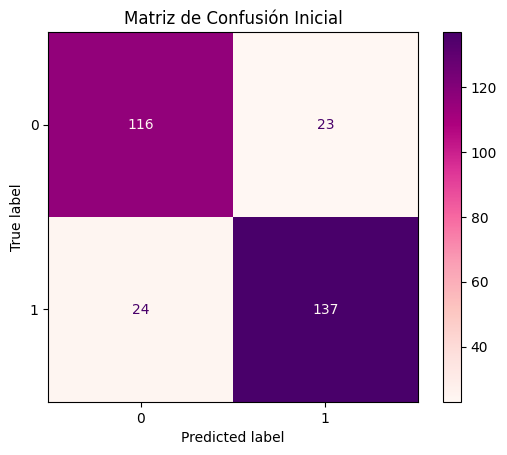

In [13]:
#MATRIZ DE CONFUSIÓN
cm_inicial, disp_inicial = crear_matriz_confusion(y_val, y_pred_inicial)
disp_inicial.plot(cmap='RdPu')
plt.title("Matriz de Confusión Inicial")
plt.show()

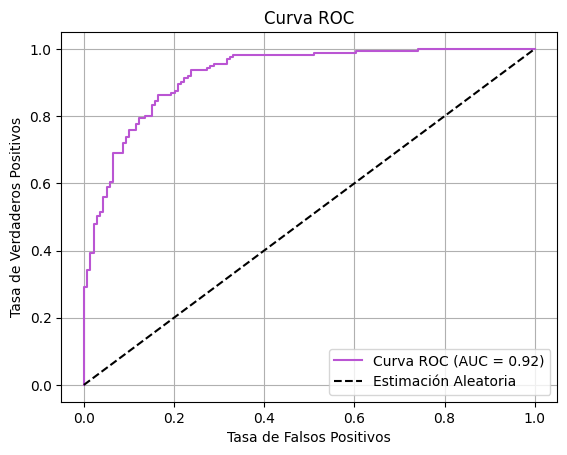

In [14]:
#CURVA ROC
fpr_inicial, tpr_inicial, thresholds_inicial, auc_score_inicial = calcular_roc_auc(y_val, y_proba_inicial)

plt.figure()
plt.plot(fpr_inicial, tpr_inicial, color='mediumorchid', label=f"Curva ROC (AUC = {auc_score_inicial:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [15]:
#MÉTRICAS TPR/FPR
TPR_inicial, FPR_inicial = metricas_tpr_fpr(cm_inicial)

# Mostrar métricas
print(f"AUC: {(auc_score_inicial * 100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR_inicial * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_inicial * 100):.4f}")

AUC: 92.3723
TPR (Tasa de Positivos Verdaderos): 85.0932
FPR (Tasa de Falsos Positivos): 16.5468


# Busquedas de mejores parámetros (Entrenamiento y Validación)

In [1]:
#BÚSQUEDA DE HIPERPARÁMETROS UTILIZANDO GRIDSEARCH
mlp = MLPClassifier(random_state= 22)

param_grid = {
    'hidden_layer_sizes': [
        (300, 200, 100),
        (256,),
        (128,),
        (512,256, 128),
        (512, 256),
        (64,),
        (400, 300, 200, 100),
        (128, 64),
        (150,)
    ],
    'activation': ['logistic', 'relu', 'tanh', 'identity'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'learning_rate': ['adaptive', 'constant', 'invscaling'],
    'max_iter': [200, 300, 400, 500]
}

cv = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=22
)

#BUSQUEDA UTILZANDO GRIDSEARCH
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

NameError: name 'MLPClassifier' is not defined

In [39]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             error_score='raise', estimator=MLPClassifier(random_state=22),
             n_jobs=-1,
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(300, 200, 100)],
                         'learning_rate': ['adaptive'], 'max_iter': [300],
                         'solver': ['adam']},
             scoring='roc_auc', verbose=1)

In [40]:
#CLASIFICADOR DE LOS MEJORES PARAMETROS
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (300, 200, 100),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'adam'}

In [41]:

best_mlp = MLPClassifier(
    hidden_layer_sizes=(300, 200, 100),
    activation='logistic',
    solver='adam',
    learning_rate='adaptive',
    max_iter=300,
    random_state=22
)

best_mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(300, 200, 100),
              learning_rate='adaptive', max_iter=300, random_state=22)

In [42]:
#REPORTE DE CLASIFICACIÓN
y_pred, y_proba, reporte = reporte_clasificacion(X_val, y_val, best_mlp)

print("Classification Report:")
print(reporte)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.87      0.83      0.85       161

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



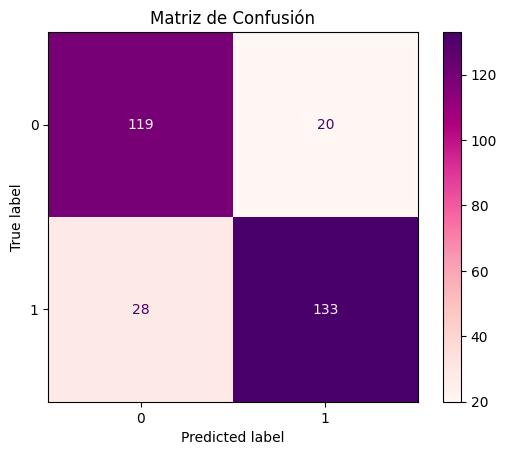

In [44]:
#MATRIZ DE CONFUSIÓN
cm, disp = crear_matriz_confusion(y_val, y_pred)
disp.plot(cmap="RdPu")
plt.title("Matriz de Confusión")
plt.show()

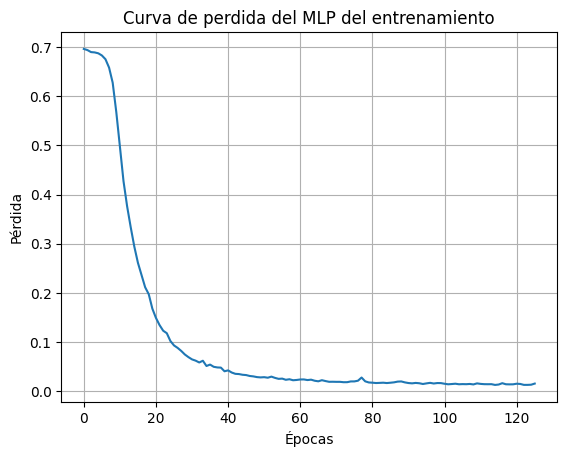

In [45]:
#CURVA DE PERDIDA DEL MLP
plt.plot(best_mlp.loss_curve_)
plt.title("Curva de perdida del MLP del entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

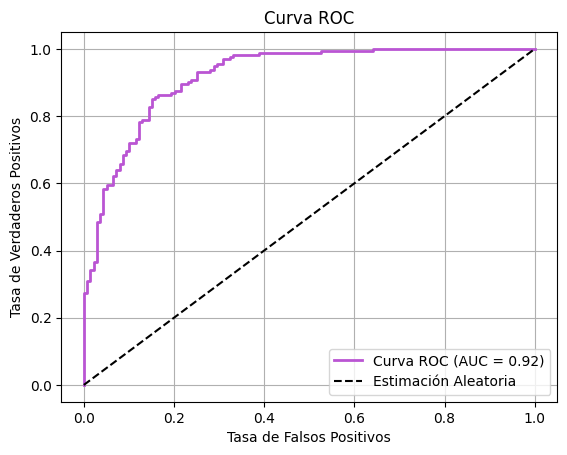

In [46]:
#CURVA ROC

auc_score, fpr, tpr, thresholds = calcular_roc_auc(y_val, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='mediumorchid', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], "k--", label="Estimación Aleatoria")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [80]:
TPR, FPR = metricas_tpr_fpr(cm)

#Mostrar métricas
print(f"AUC: {(auc_score*100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR*100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR*100):.4f}")

AUC: 92.0595
TPR (Tasa de Positivos Verdaderos): 84.3284
FPR (Tasa de Falsos Positivos): 25.0000


## Modelo Final (Entrenamiento y Prueba)

In [81]:
#EVALUACIÓN CON CONJUNTOS DE PRUEBA FINAL
modelMLP = MLPClassifier(
    hidden_layer_sizes=(300, 200, 100),
    activation='logistic',
    solver='adam',
    learning_rate='adaptive',
    max_iter=300,
    random_state=22
)

modelMLP.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(300, 200, 100),
              learning_rate='adaptive', max_iter=300, random_state=22)

In [82]:
X_test, y_test = cargar_datos_prueba()

shape_test, head_test = imprimir_forma(X_test)
print("Shape test: ", shape_test)
head_test

In [83]:
#REPORRTE DE CLASIFICACIÓN FINAL
y_pred_test, y_proba_test, reporte_test = reporte_clasificacion(X_test, y_test, modelMLP)

print("Classification Report:")
print(reporte_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       116
           1       0.80      0.84      0.82       134

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



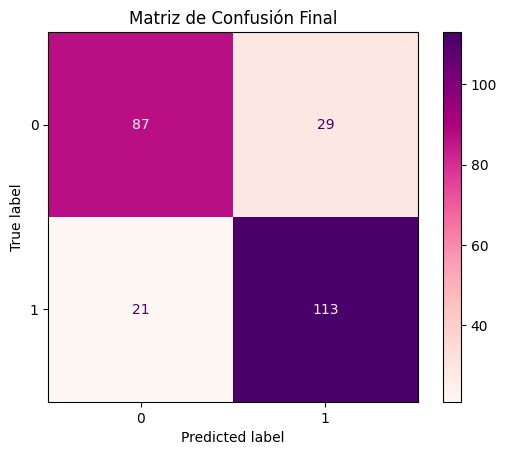

In [84]:
#MATRIZ DE CONFUSIÓN FINAL
cm_test, disp_test = crear_matriz_confusion(y_test, y_pred_test)
disp_test.plot(cmap="RdPu")
plt.title("Matriz de Confusión Final")
plt.show()

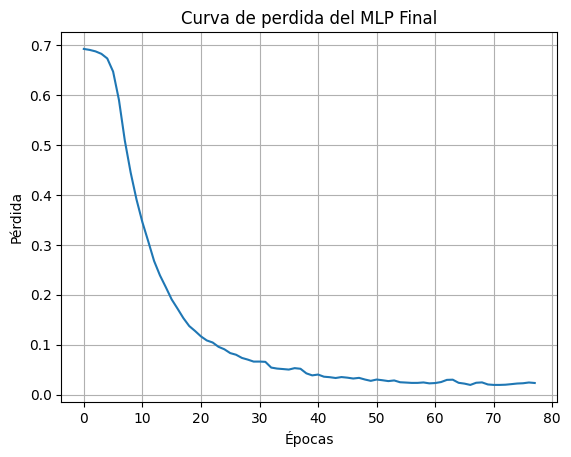

In [85]:
#CURVA DE PERDIDA DEL MLP FINAL
lt.plot(modelMLP.loss_curve_)
plt.title("Curva de perdida del MLP Final")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

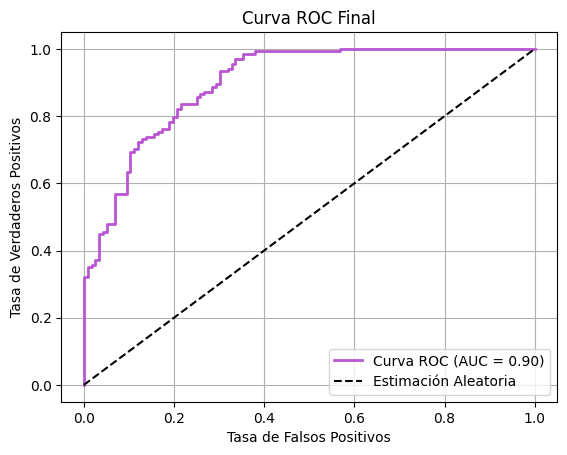

In [86]:
#CURVA ROC FINAL
fpr_test, tpr_test, thresholds_test, auc_score_test = calcular_roc_auc(y_test, y_proba_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='mediumorchid', lw=2, label=f'Curva ROC (AUC = {auc_score_test:.2f})')
plt.plot([0, 1], [0, 1], "k--", label="Estimación Aleatoria")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Final')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [87]:
TPR_test, FPR_test = metricas_tpr_fpr(cm_test)

#Mostrar métricas
print(f"AUC: {(auc_score_test*100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR_test*100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_test*100):.4f}")

AUC: 90.0347
TPR (Tasa de Positivos Verdaderos): 84.3284
FPR (Tasa de Falsos Positivos): 25.0000


In [89]:
#GUARDAR MODELO FINAL SEREALIZADO (PEPINILLO)
hacer_pepinillo(modelMLP, "modelMLP.pkl")